### Nick's workings for traffic accidents machine learning

In [300]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pylab as plt
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

% pylab inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

Populating the interactive namespace from numpy and matplotlib


/Users/nkwjones/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Create some random data, 100 rows and 9 features

In [288]:
data = np.random.randn(100,10)+3
df = pd.DataFrame(data)
df.columns = "X0","X1","X2","X3","X4","X5","X6","X7","X8","y"
df.y = 2*df.X0+0.2*df.X1+3*df.X3+5*df.X5+0.5*df.X8**2   # I made X0, X1, X3 and X8 most meaningful
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,4.522854,2.045348,1.440837,3.126799,3.641883,2.972397,4.645319,2.927581,2.754139,37.489801
1,1.345974,4.078505,1.110142,1.737858,4.004042,3.435397,3.862414,3.189454,1.687312,27.321715
2,3.568416,2.700973,3.308475,4.515425,1.148865,3.226090,1.140181,2.600468,2.958596,41.730394
3,1.189639,1.925983,3.582703,3.626483,0.714322,3.519702,2.612872,4.063994,2.488679,34.339194
4,1.595476,3.389166,3.801380,2.199531,3.780843,0.734267,1.913898,3.485170,3.500746,20.266326


In [289]:
# make NP arrays of the X and y values

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# split data into 70% train, 30% test

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

          X0        X1        X2        X3        X4        X5        X6  \
41  2.594245  4.164871  3.070052  4.254778  2.490085  2.954789  4.009757   
20  3.468418  3.210328  4.427217  3.211907  4.940996  3.935630  4.159727   
84  1.780886  3.662821  3.228878  2.836884  1.676140  1.726799  3.311522   
37  4.028937  2.309471  2.304820  2.652370  2.326325  2.879981  3.590989   
88  4.641710  2.944917  2.952824  4.260097  1.829997  5.444925  2.589933   

          X7        X8  
41  0.277122  2.116178  
20  3.742775  3.024824  
84  3.104939  4.232396  
37  2.984608  3.214145  
88  3.077459  1.867081  


#### Practice on training models with SKL

In [294]:
# Train models

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train,y_train)
svr = SVR(C=1.0, epsilon=0.2).fit(X_train, y_train)

# Find the R2 of the linear and ridge models
# Using mean of 10 train-test splits
# Ridge has arbitrary alpha parameter of 1

OS_lr=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    lr=LinearRegression().fit(X_train,y_train)
    OS_lr.append(lr.score(X_test,y_test))
print("Linear regression (R2): ",np.mean(OS_lr))

# Ridge model, 10 random train-test splits: out-of-sample R2

OS_ridge=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    ridge=Ridge(alpha=1).fit(X_train,y_train)
    OS_ridge.append(ridge.score(X_test,y_test))
print("Ridge regression (R2): ",np.mean(OS_ridge))


Linear regression (R2):  0.982339592538
Ridge regression (R2):  0.982147910318


In [293]:
# Grid search to tune the parameter for ridge.
# Does it perform better?

from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-4, 0, 200)}

OS_ridge=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    rid=Ridge()
    gr=GridSearchCV(rid,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    print(rs.best_params_)
    OS_ridge.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
print(np.mean(OS_ridge))
print("Yes")

{'alpha': 0.0001}
{'alpha': 0.0001}
{'alpha': 0.0001}
{'alpha': 0.0001}
{'alpha': 0.31440354715915003}
{'alpha': 0.13049019780144031}
{'alpha': 0.69055135201623308}
{'alpha': 0.0001}
{'alpha': 0.2612675225563329}
{'alpha': 0.098849590466255868}
0.982835397688
Yes


### Plot predicted values from the Linear Regression (vs. the actual values)

Predicted:  [ 27.43580294  28.1236736   36.79627828  26.67556187  35.15356323
  39.68533868  41.17408691  41.82327545  37.41810312  38.53818169] 

Actual:  [ 27.22109109  28.26076446  36.76560575  25.85583851  34.33919385
  38.88242782  40.30294013  41.46755249  36.57975692  38.24903328]


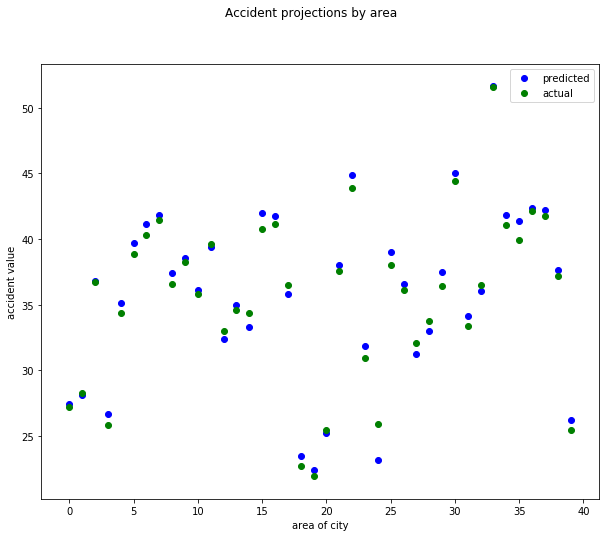

In [299]:
# Generate predicted Ys for lr and ridge.

# Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
lr=LinearRegression().fit(X_train,y_train)

# Predict values for the test set
y_pred = lr.predict(X_test)

# Print out the predicted vs. actual values
print("Predicted: ",y_pred[:10],"\n")
print("Actual: ",np.asarray(y_test)[:10])

# Bar chart with pred vs actual
x_axis = np.arange(len(y_pred))

barWidth = 0.3

plt.scatter(x_axis, y_pred,color='b',label = 'predicted')
plt.scatter(x_axis, y_test, color='g',label = 'actual')
plt.legend()
plt.xlabel('area of city')
plt.ylabel('accident value')
plt.suptitle('Accident projections by area')
plt.show()


### Code for PCA for feature selection

This is helpful when you have large number of features and want to find the ones that explain the largest share of variance. For example when doing OLS.

[ 0.16868476  0.14790781  0.1365724   0.1261309   0.10354715  0.09747381
  0.08069734  0.07608951  0.06289632]


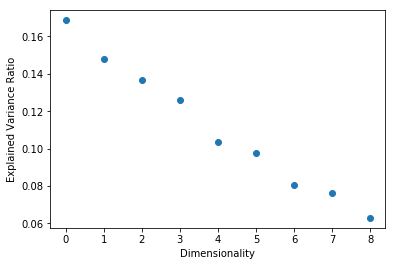

In [234]:
## PCA for feature selection on my sample data

n=9 # number of attributes
pca = PCA(n)
P = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_

# print the explained variance for the most helpful attributes
print(eigenvalues)

# Plot explained variance for the the attributes in rank order
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

### Linear regression and SVMs
- Build (i) OLS; (ii) SVR gaussian; (iii) SVR linear.
- Print their R2
- Plot the predicted values vs. actual values for each grid area

OLS out of sample r2: 0.89
SVM gaussian out of sample r2: 0.82
SVM linear out of sample r2: 0.89


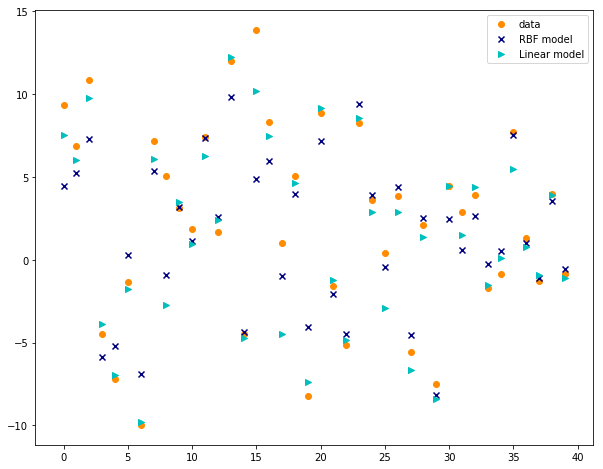

In [283]:
# Create models: an OLS and two SVMs (gaussian and linear kernels)

ols = LinearRegression()
svr_rbf = SVR(kernel="rbf",C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)

# Fit to training data and predict test values
y_ols = ols.fit(X_train, y_train)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)

# Print r2 scores
print("OLS out of sample r2: {:.2f}".format(y_ols.score(X_test,y_test)))
print("SVM gaussian out of sample r2: {:.2f}".format(svr_rbf.score(X_test,y_test)))
print("SVM linear out of sample r2: {:.2f}".format(svr_lin.score(X_test,y_test)))

# x-axis is length of predictions

x_axis = np.arange(len(y_test))

# Plot

plt.scatter(x_axis, y_test, color='darkorange', label='data')
plt.scatter(x_axis, y_rbf, color='navy', marker = 'x',label='RBF model')
plt.scatter(x_axis, y_lin, color='c', marker = '>',label='Linear model')

plt.legend()
plt.show()


### Model options
#### 1. Linear regression (OLS, ridge, lasso)

"Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features."

_Parameters_:
 - ridge: Objective = RSS + α * (sum of square of coefficients)
 - lasso: Objective = RSS + α * (sum of absolute value of coefficients)
 
So we need the optimal alpha for either of these.

#### 2. SVM regression
 - linear kernel
 - RBF (gaussian) kernel
 
Parameters:
 - linear needs C (term to penalize observations across the boundary lines)
 - RBF needs C and gamma. ("If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.")
 
#### 3. Ensemble tree methods

3.1: Random forest
Parameters
 - number of trees
 - max depth

Advantage: visualize feature importance in the tree structure

3.2 Gradient boosted trees regression
 - min child weight (ie. minimum observations for a new leaf)
 - max iterations (keep it as high as your computation budget allows)
 - max depth

Similar to random forest but the trees learn off each other rather than being constructed independently.

### Build a random forest regressor

In [320]:
# New random dataset (more features) and train-test split
#Xa, ya = make_regression(n_features=30, n_informative=5,
#                       random_state=0, shuffle=False)
#Xa_train, Xa_test, ya_train, ya_test = train_test_split(X, y, test_size = 0.4, random_state = i) 

# Fit a random forest to the sample data

rf = RandomForestRegressor(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
y_rf = rf.fit(X_train, y_train).predict(X_test)

# Print the R2
rf.score(X_test,y_test)


0.61711950409660887

--> not great. Less good than standard OLS. Does a larger number of trees make it better?

#### Build random forest regressors with between 1 and 50 trees. See how the R2 changes.

In [330]:
R2=[]
for i in range(1,51,5):
    rf = RandomForestRegressor(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    R2.append(rf.score(X_test,y_test))
print(R2)

[0.038464028993126953, 0.61542774748990681, 0.73540304121615818, 0.65558989589986671, 0.67310351028558113, 0.65562254017895905, 0.63179494986645379, 0.65105811583087458, 0.67234447751982329, 0.64401108488724723]


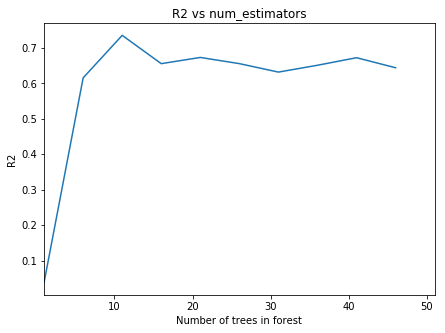

In [331]:
plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),R2)
plt.xlabel("Number of trees in forest")
plt.ylabel("R2")
plt.title("R2 vs num_estimators")
plt.xlim(1,51)
plt.show()

### Optimize number of estimators through GridSearchCV

In [334]:
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestRegressor(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='r2')
rs = gs.fit(X_train,y_train)
pred=rs.predict(X_test)
print(rs.best_params_)
#printroc_auc_score(np.array(y_test),pred)

{'n_estimators': 26}


In [335]:
param_grid = {'max_depth':range(1,10)}
rf = RandomForestRegressor(n_jobs=-1,n_estimators=26)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='r2')
rs = gs.fit(X_train,y_train)
pred=rs.predict(X_test)
print(rs.best_params_)
#printroc_auc_score(np.array(y_test),pred)

{'max_depth': 9}
